In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Step 1: Gather Twitter data
def load_data(file_path, num_samples=100000):
    df = pd.read_csv(file_path, encoding='latin-1', header=None, 
                     names=['sentiment', 'id', 'date', 'query', 'user', 'text'])
    df = df[['sentiment', 'text']]
    df['sentiment'] = df['sentiment'].map({0: 'negative', 4: 'positive'})
    return df.sample(n=num_samples, random_state=42)

# Load the data
data = load_data('../Practical 4/data.csv', num_samples=1000)
print(data['sentiment'].value_counts())
data.head()

sentiment
negative    1000
Name: count, dtype: int64


,sentiment,text
80956,negative,so.. cold..
109622,negative,sick! cold! cough! and fever! just at the mis...
148312,negative,@_theX . . . And yet you never come to Beantow...
79883,negative,@JenAlaniz Wasn't it though! I love the 90's! ...
267821,negative,"@DirtyDiva sorry, but @jeffrubenstein didn't w..."


In [3]:
# Step 2: Preprocess and prepare the data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove user mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def tokenize_and_stem(text):
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    words = nltk.word_tokenize(text)
    return [ps.stem(word) for word in words if word not in stop_words]

# Apply preprocessing
data['processed_text'] = data['text'].apply(preprocess_text)
data.head()

,sentiment,text,processed_text
80956,negative,so.. cold..,so cold
109622,negative,sick! cold! cough! and fever! just at the mis...,sick cold cough and fever just at the mist of ...
148312,negative,@_theX . . . And yet you never come to Beantow...,and yet you never come to beantown smh haha
79883,negative,@JenAlaniz Wasn't it though! I love the 90's! ...,wasnt it though i love the s and the s so cool...
267821,negative,"@DirtyDiva sorry, but @jeffrubenstein didn't w...",sorry but didnt want any of my hugs


In [4]:
# Step 3: Train and test a Sentiment Analysis model
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['processed_text'], data['sentiment'], test_size=0.2, random_state=42)

# Create TF-IDF vectors
vectorizer = TfidfVectorizer(tokenizer=tokenize_and_stem, max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train KNN model
k = int(len(X_train) ** 0.5)  # Set k to square root of training data size
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_tfidf, y_train)

# Evaluate model
y_pred = knn.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

d:\Coding\College-Code-sem7\venv\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



d:\Coding\College-Code-sem7\venv\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


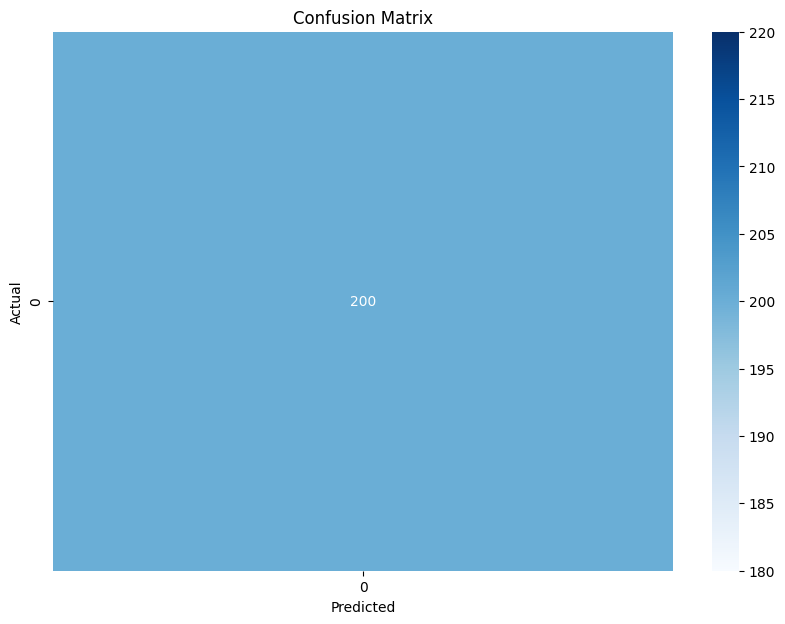

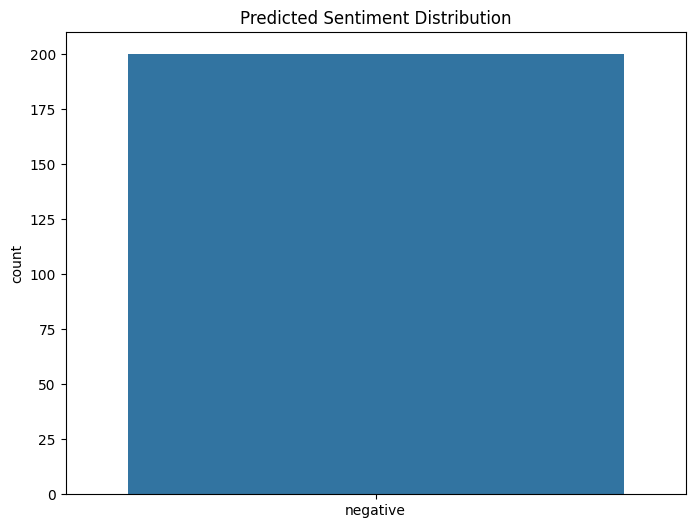

In [5]:
# Step 4: Visualize and verify the results
def visualize_results(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Sentiment distribution
    plt.figure(figsize=(8, 6))
    sns.countplot(x=y_pred)
    plt.title('Predicted Sentiment Distribution')
    plt.show()

visualize_results(y_test, y_pred)

In [6]:
# Example of using the model for new tweets
new_tweets = [
    "I love this product! It's amazing!",
    "This is the worst experience ever. Terrible service.",
    "The weather is nice today."
]
new_tweets_processed = [preprocess_text(tweet) for tweet in new_tweets]
new_tweets_tfidf = vectorizer.transform(new_tweets_processed)
predictions = knn.predict(new_tweets_tfidf)

for tweet, sentiment in zip(new_tweets, predictions):
    print(f"Tweet: {tweet}")
    print(f"Predicted sentiment: {sentiment}\n")

Tweet: I love this product! It's amazing!
Predicted sentiment: negative

Tweet: This is the worst experience ever. Terrible service.
Predicted sentiment: negative

Tweet: The weather is nice today.
Predicted sentiment: negative

